# Algoritmos para Big Data 
**2022/2023**


# Introduction to Apache Spark
In this lecture we will introduce the Spark framework. Right now, the goal is to explain how it works and to highlight its potentiality.

**Disclaimer**: Some content presented in this notebook e.g. images are based on references mentioned at the end of the notebook.

**Context** 

Long time ago, computers got faster mainly due to processor speed increases. And most of the applications were designed to run in a single processor machine. But as more data was required to be processed and hardware limits were being tested, research efforts moved towards parallel processing and new programming models. 

**Apache Spark** 
- is an open-source distributed cluster-computing framework. It is designed for large-scale distributed data processing, with focus on speed and modularity;
- provides in-memory storage for intermediate computations;
- contain libraries with APIs for machine learning, SQL, stream processing and graph processing.


# Spark components and APIs
Spark offers four components as libraries for diverse workloads in a unified stack.

Code can be written in the languages Scala, SQL, Python, Java or R, which then is decomposed into bytecode to be executed in Java Virtual Machines (JVMs) across the cluster.

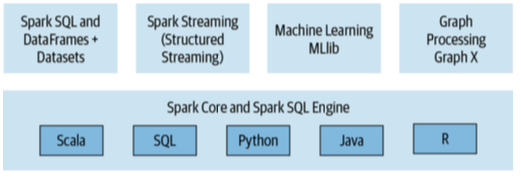

There are both low-level and high-level APIs related to (distributed) collections of data. We may have collections of:

* **Resilient Distributed Dataset (RDD)**
    * they are now consigned to low-level APIs
* **DataFrame**
    * the most commom structured data - it simply represents a table of data with rows and columns
* **Dataset**
    * collection of objects but only makes sense in the case of Scala and Java 

Further details are to be covered later on but we can highlight now that our focus will be on **DataFrames**

## Spark Core and Spark SQL Engine
Spark Core contains basic functionalities for running jobs and that are needed by other components. Spark SQL Engine provides additional help to do so.

Computations will ultimatelly convert into low-level RDD-based bytecode (in Scala) to be distributed and run in executors across the cluster.

## Spark SQL
Spark SQL provides functions for manipulating large sets of distributed structured data using an SQL subset. (ANSI SQL:2003-compliant)

It can also be used for **reading** and **writing** data to and from various structured formats and data sources, such as JavaScript Object Notation (JSON) files, CSV files, Parquet files (an increasingly popular file format that allows for storing a schema alongside the data), relational databases, Hive, and others.  
  
There is also a query optimization framework called Catalyst.

## Spark Structured Streaming
Spark Structured Streaming is a framework for ingesting real-time streaming data from various sources, such as HDFS-based, Kafka, Flume, Twitter, ZeroMQ, as well as customized ones. 

Developers are able to combine and react in real time to both static and streaming data. A stream is perceived as a continuaslly growing structured table, upon against which queries are made as if it was a static table.

Aspects of fault tolerance and late-data semantics are handled via Spark SQL core engine. Hence, developers are focussing on just writing streaming applications. 

## Machine Learning MLlib
Spark MLlib is a library of common machine-learning (ML) algorithms built on top of DataFrame-based APIs. Among other aspects, these APIs allow to extract or transform features, build pipelines (for training and evaluating) and persist models during deployment (for saving/reloading)

Available ML algorithms include logistic regression, naïve Bayes classification, support vector machines (SVMs), decision trees, random  forests, linear regression, k-means clustering, among others. 

## Graph Processing GraphX
Spark Graphx is a library for manipulating graphs, that is, data  structures  comprising  vertices  and  the  edges  connecting  them. 

It provides  algorithms for building, analysing, connecting and traversing graphs. Among others, there are implementations of important algorithms of graph theory, such as page rank, connected components, shortest paths and singular value decomposition. (SVD)

# Standalone application running in local mode
Conceptually, we prototype the application by running it locally with small datasets; then, for large datasets, we use more advanced deployment modes to take advantage of distributed and more powerful execution.

## Spark shells

Spark provides four interpretative shells (windows) to carried out ad hoc data analysis:
* pyspark
* spark-shell
* spark-sql
* sparkR

They resemble their shell counterparts for the considered languages. The main difference now is that they have extra support for connecting to the cluster and to loading distributed data into worker's memory

Notice that, if using shells:
* the driver is part of the shell
* the SparkSession mentioned above is automatically created, accessible via the variable `spark`
* they are exited pressing Ctrl-D

Note: in accordance to the location of the Spark installation in our computer, we have set for the shell (terminal window) the following environment variables (in the file ~/.bashrc)  

    export SPARK_HOME=/opt/spark

    export PATH=$PATH:~/.local/bin:$SPARK_HOME/bin:$SPARK_HOME/sbin

    export PYSPARK_PYTHON=/usr/bin/python3
    
or (in the file ~/.zshrc or ~/.zprofile)

    export SPARK_HOME=/opt/homebrew/Cellar/apache-spark/3.3.1/libexec

    export PATH=$PATH:/usr/local/bin:$SPARK_HOME/bin:$SPARK_HOME/sbin

    export PYSPARK_PYTHON=/opt/homebrew/bin/python3

By the way, in Linux the command `which` is useful for checking where programms are installed.

## Example running in a `pyspark` shell
Reading a file and then showing top 10 lines, as well as the number of lines. It runs locally, in a single JVM.

First, open an autonomous shell (Terminal window) and run the following commands, one by one:

    ls -la > listdir.txt
    which pyspark
    pyspark --help
    pyspark
    spark.version
    2+3

And then execute the commands (the provided file, created above, would be located in the current directory)

    lines = spark.read.text("listdir.txt")
    lines.show(10, truncate=False)
    lines.count()
    quit()

# Execution in a distributed architecture
A **Spark Application** consists of a **driver** program responsible for orchestrating parallel operations on the Spark cluster. The driver accesses the distributed components in the cluster (**executors** and **manager**) via a **SparkSession**. 

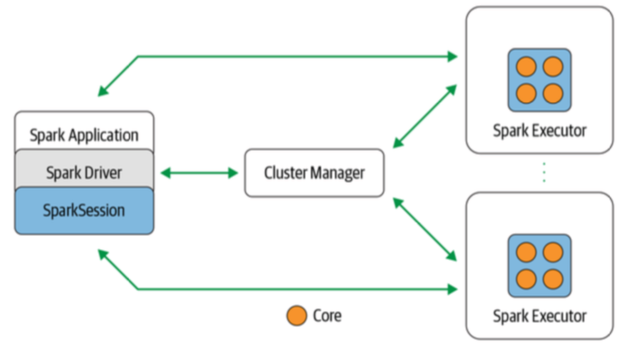

# SparkSession
A SparkSession instance provides a single entry point to all functionalities, either by running as standalone aplication, or by running in the notebook.

For a Spark application, one needs to create the SparkSession object if none is available, as described below. In that case, we can configure it according to ower own needs. 

But first, we have to make sure we can access **pyspark** from this notebook. One way to do so is to run the notebook using use a suitable kernel. That is why we have already set one.

For the time being there is no need to provide furter details about this kernel - it is just a file named *kernel.json* placed in a proper location and with some settings.

However, when the code is to be submited to a cluster, it will run in as batch process. In that case, we
should start with something like:

    from pyspark.sql import SparkSession

    # build our own SparkSession
    spark = SparkSession\
        .builder\
        .appName("BigData")\
        .config("spark.sql.shuffle.partitions",6)\
        .config("spark.sql.repl.eagereval.enabled",True)\
        .getOrCreate()

## SparkSession created by current `pyspark` kernel

Since we are using a `pyspark` kernel, that is already set up for as ``spark``

We could now use ``spark`` as the sparkSession object. 

In [1]:
# check it

spark

In [2]:
# print SparkSession object

print(spark)

## Cluster manager and executors

* **Cluster manager**
    * responsible for managing the executors in the cluster of nodes on which the application runs, alongside allocating the requested resources
    * agnostic where ir runs as long as responsabilities above are met
* **Spark executor**
    * runs on each worker node in the cluster
    * executors communicate with driver program and are responsible for executing tasks on the workers

* **Deployment modes**

    * variety of configurations and environments available, as shown below: (just for reference)

    
| Mode           | Spark driver                                       | Spark executor | Cluster manager |
|:----------------|:----------------------------------------------------|:----------------|:-----------------|
| Local          | Runs on a single JVM, like a laptop or single node | Runs on the same JVM as the driver              | Runs on the same host               |
| Standalone     | Can run on any node in the cluster                                               | Each node in the cluster will launch its own executor            | Can be allocated arbitrarily to any host in the cluster             |
| YARN (client)  | Runs on a client, not part of the cluster                                                | YARN's NodeManager's container            | YARN's Resource Manager works with YARN's Application Master to allocate the containers on NodeManagers for executors             |
| YARN (cluster) | Runs with the YARN Application Master                                                | Same as YARN client mode            | Same as YARN client mode        |
| Kubernetes     | Runs in a Kubernetes pod                                          | Each worker runs within its own pod       | Kubernetes Master         |
    

## Distributed data and partitions

* Partitioning of data allows for efficient paralelism since every executor can perform work in parallel
* Physical data is break up and distributed across storage as chunks called partitions, whether in HDFS or in cloud storage.
* Each partition is treated as a dataframe in memory (logical data abstraction)
    * hence it is a collection of rows that sits on one physical machine of the cluster;
    * so if we have dataframes in our program we do not (for the most part) manipulate partitions individually - we simply specify high level transformations of data in the physical partitions, and Spark determines how this will play out across the cluster.
* As much as possible, data locality is to be pursuit. It means that an executor is prefereably allocated a task that requires reading a partition closest to it in the network in order to minimize network bandwidth.

**Question**: What happens if we have
* multiple partitions but only one executor;
* one partition but thousands of executors?


# Spark operations and related computation
Operations on distributed data are of two types: **transformations** and **actions**

## Basic concepts

* **Job**: parallel computation created by the driver, consisting of multiple tasks that gets spawned in response to actions, e.g save()
* **Stage**: each job gets divided into smaller sets of tasks called stages, that depend on each other
* **Task**: single unit of work or execution to be sent to a Spark executor (a task per core)



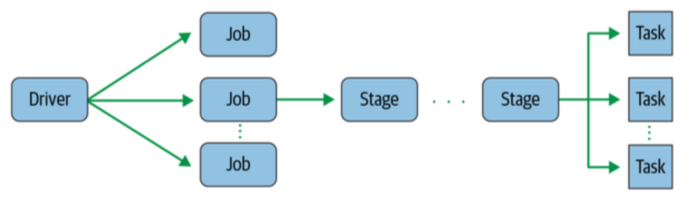

 ## Transformations
 
In Spark core data structures are **Immutable**, that is, they cannot be changed after creation. If one wants to change a dataframe we need to instruct Spark how to do it. These are called transformations.
 
Hence, transformations transform a DataFrame into a new one without altering the original data. So it returns a new one but transformed.

Some examples are:

|Transformation | Description|
|:-------|:-------|
|**orderBy()**|Returns a new DataFrame sorted by specific column(s)|
|**groupBy()**|Groups the DataFrame using specified columns, so we can run aggregation on them|
|**filter()**|Filters rows using a given condition|
|**select()**|Returns a new DataFrame with select columns|
|**join()**|Joins with another DataFrame, using a given join expression|

These transformations will be explained in more detailed in the next lecture.

**Back to our spark session...**

Checking the content of a text file.

In [ ]:
# Check the current dir and its content

! pwd
! ls -la

In [ ]:
# (make sure the location/name of the file is correct)

strings = spark.read.text("listdir.txt")
strings.count()

In [ ]:
# See our dataframe schema 

strings.printSchema()

In [ ]:
# Show only 5 full lines (not truncated)

strings

In [ ]:
# Filtering lines with a particular word (example: "Spark")

filtered = strings.filter(strings.value.contains("Spark"))
filtered.show(truncate=False)
filtered.count()

### Types of transformations

Transformations can be:
* Narrow
    * a single output partition can be computed from a single input partition (no exchange of data, all performed in memory)
    * examples are **filter()**, **contains()**
* Wide
    * data from other partitions across the cluster is read in, combined, and written to disk
    * examples are **groupBy()**, **reduceBy()**


### Example

**Reading structured data, filter some of them and then show the result but sorted**

(The file is on the same folder as this notebook)

In [ ]:
# Prior, just let us check the file we are about to use (with help of Linux commands)

! ls -la

In [ ]:
! head ./us-airline-delay-2016-2018/2018.csv

In [ ]:
# Read the datafile into a DataFrame using the CSV format, 
# by inferring the schema and specifying that the file contains a header,
# which provides column names for comma-separated fields

file_path = "./us-airline-delay-2016-2018/2018.csv"
flights = spark.read.load(file_path, 
                          format="csv",
                          sep=",", 
                          inferSchema="true", 
                          header="true")
flights.
flights # or print(flights)

In [ ]:
# Check how many records we have in the DataFrame

flights.

In [ ]:
# and showing some of them ex: 2 (consider the option vertical=True)

flights.

In [ ]:
# Some of the columns are not interesting. Let us get rid of them. Feel free to delete more. 
# Also, because dataframes are big and consume memory, we are going to delete the one 
# that is no longer needed

cols_to_drop = ("TAXI_OUT", "TAXI_IN", "WHEELS_OFF", "WHEELS_ON", 
                "CARRIER_DELAY", "WEATHER_DELAY", 
                "NAS_DELAY", "SECURITY_DELAY", 
                "LATE_AIRCRAFT_DELAY", "Unnamed: 27")                                                                                           
info_flights = flights.drop(*cols_to_drop)

del flights

In [ ]:
# Show the flights

info_flights.

 ## Lazy evaluation and actions
 
Spark uses lazy evaluation, that is, it waits until the very last moment to execute the graph of computational instructions established, that is, the plan of transformations that we would like to apply to the data.

As results are not computed immediately, they are recorded as **lineage** (*trace of descendants*) and at later time in its execution plan, Spark may rearrange certain transformations, coalesce them, or optimize transformations into stages for more efficient execution of the entire flow.
 
Only when an **action** is invoked or data is read/written to disk the lazy evaluation of all recorded transformations is triggered.

An action is like a play button. We may have:
* Actions to view data in the console.
* Actions to collect data to native objects in the respective language.
* Actions to write to output data sources.

Some examples are:

|Action | Description|
|:-------|:-------|
|**show()**|Prints the first rows to the console|
|**take()**|Returns the first rows as a list|
|**count()**|Returns the number of rows|
|**collect()**|Returns all the records as a list|
|**save()**|Saves the contents to a data source|

In [ ]:
# Using the variable info_flights (a DataFrame) set before...

selected_flights = info_flights.where(info_flights.OP_CARRIER == "UA") 
# why didn't return the output, in this case regarding only United Airline flights?

In [ ]:
# How is going to compute the result?

selected_flights.explain() # or selected_flights.explain(extended=True)

In [ ]:
# Count

selected_flights.

In [ ]:
# Get 5 of them

selected_flights.

In [ ]:
# The 1st one

selected_flights.

In [ ]:
# and show

selected_flights.

## Fault tolerance
**Lineage** in the context of lazy evaluation and **data immutability** mentioned above gives resiliency in the event of failures as:
* Spark records each transformation in its lineage;
* DataFrames are immutable between transformations;

then Spark can reproduce the original state by replaying the recorded lineage.

## Spark UI
Spark UI allow us to monitor the progress of a job. It displays information about the state of Spark jobs, its environment and the cluster state. So it is very useful for tuning and debugging.
 
Usually Spark UI is available on port 4040 of the driver node. (If that port is occupied, another one is provided)

In local mode: http://localhost:4040 in a web browser.


    PS: recall notebook cell above when myspark was checked.

In [ ]:
spark.sparkContext.uiWebUrl # check where spark ui is running

Check the link presented above after execution.

# Exercise

Our goal now is to write down a Spark program that:

a) Reads a file containing flight data in 2017.

b) Creates a DataFrame with the columns 

     FL_DATE, OP_CARRIER, OP_CARRIER_FL_NUM, ORIGIN, DEST, 
     CRS_DEP_TIME, DEP_TIME, DEP_DELAY, 
     CRS_ARR_TIME, ARR_TIME, ARR_DELAY,     
     CRS_ELAPSED_TIME, ACTUAL_ELAPSED_TIME, 
     AIR_TIME, DISTANCE
 
and add four more columns with, respectively in relation to the flight date, the year, the month, the day of the week and the week of the year. 
 
c) Provides answers to the following questions about the data under analysis:

1. How many flights are recorded in the dataset?
2. What are the average of departure delay (DEP_DELAY) and the average of arrival delay (ARR_DELAY)?
3. Which are the top 3 busiests airpoirts regarding departures?
4. Give an airport such as no other airport have more arrivals? 
5. Which airline holds the heighest number of departures in an airport, and which airport is?

The original dataset can be found via the link

https://www.kaggle.com/datasets/yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018?select=2018.csv


## The Spark program

In [ ]:
# Import necessary libraries

import sys

import pyspark.sql.functions as F   # See convenient use of F below

In [ ]:
# Read the dataset

file_path = "./us-airline-delay-2016-2018/2017.csv"

flight_data = ( spark.read.format("csv")
                   .option("header","true")
                   .option("inferSchema","true")
                   .option("sep",",")
                   .load(file_path) 
              )


In [ ]:
# First, let us check the schema and the initial lines of the dataset. 
# We should take this step...

flight_data.
flight_data.

In [ ]:
# Also, we can have a variable with the columns

cols = flight_data.columns

In [ ]:
# Just a detail: to figure out how, for example, sorting by FLIGHTS would work

flight_data.sort("OP_CARRIER").explain() # check the Spark physical plan

**Before moving on, a note about reading data from a csv file:**

Above, we have inferred the schema from the first line of the csv file. And by the way reading is a transformation not an action.

But we could have set the schema programatically and then read the data from the file accordingly. When schema is inferred from a huge file this may take some time. So in those circunstances we may decide to set the schema programmatically. 

In [ ]:
# Specify the DataFrame with data of interest
# We can select a subset or drop a subset!

cols_interest = ["FL_DATE", "OP_CARRIER", "OP_CARRIER_FL_NUM", "ORIGIN", "DEST",   
     "CRS_DEP_TIME", "DEP_TIME", "DEP_DELAY",      
     "CRS_ARR_TIME", "ARR_TIME", "ARR_DELAY",         
     "CRS_ELAPSED_TIME", "ACTUAL_ELAPSED_TIME",   
     "AIR_TIME", "DISTANCE"]


flight_data = flight_data.select(cols_interest)
flight_data.columns

In [ ]:
# Add four more columns with, respectively in relation to the flight date, 
# the year, the month, the day of the week and the week of the year
    
flight_data = ( flight_data
                .withColumn("FL_DATE_YEAR", F.year("FL_DATE"))
                .withColumn("FL_DATE_MONTH", F.month("FL_DATE"))
                .withColumn("FL_DATE_DAY_OF_WEEK", F.dayofweek("FL_DATE"))
                .withColumn("FL_DATE_WEEK_OF_YEAR", F.weekofyear("FL_DATE"))    
                )

Note: See functions related to Timestamp fields in

https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.to_timestamp.html

https://spark.apache.org/docs/latest/sql-ref-datetime-pattern.html
 
https://spark.apache.org/docs/latest/sql-ref-functions-builtin.html#date-and-timestamp-functions

In [ ]:
# Check the 1st record of data now

flight_data.show(1, vertical=True)

## Questions to be answered

### How many flights are recorded in the dataset?

In [ ]:
flight_data.

### What are the average of departure delay (DEP_DELAY) and the average of arrival delay (ARR_DELAY)?

In [ ]:
flight_data.

### Which are the top 3 busiests airports regarding departures?

In [ ]:
flight_data.

### Give an airport such that no other airport have more arrivals?

In [ ]:
flight_data.

### Which airline holds the highest number of departures in an airport, and which airport is?

In [ ]:
flight_data.

In [ ]:
# Finally, we may stop the SparkSession if we want

spark.stop()

## Answers regarding the questions above

### How many flights are recorded in the dataset?
answer: 5674621

### What are the average of departure delay (DEP_DELAY) and the average of arrival delay (ARR_DELAY)?
answer:

|Average departure delay | Average arrival delay|
|:-------|:-------|
| 9.725734044679225 | 4.3263569087054 |


### Which are the top 3 busiests airpoirts regarding departures?

answer:

| Origin | count |
|:-:|:-|
|   ATL|364655|
|   ORD|266460|
|   DEN|223165|


### Give an airport such that no other airport have more arrivals? 

answer: ATL (364596 flights)

### Which airline holds the highest number of departures in an airport, and which airport is?

answer: carrier=DL, airport=ATL (242493 flights)

# Additional exercises

## Reading a directory of data at once

In the case of having many files in one directory and sharing the same schema, we can read all files at once into one dataframe. Of course, in practical terms, the resulting dataframe may be too big. (Try using Pandas!)

With data regarding US flights delays that have been provided, read the complete dataset for many years with a single read command.

Hint: Try by indicating the directory where all files are located, instead of making reference to a specific filename.

See https://spark.apache.org/docs/latest/sql-data-sources-generic-options.html#path-global-filter


## Examples from the Spark distribuion
The Spark distribution contains a few examples. We ask you to look at the directory 

*$SPARK_HOME/examples/src/main/python* 

and try to run the following examples but in a notebook: (minor adjustments might be needed)

1. wordcount
2. sort

# References

* Learning Spark - Lightning-Fast Data Analytics, 2nd Ed. J. Damji, B. Wenig, T. Das, and D. Lee. O'Reilly, 2020
* Spark: The Definitive Guide - Big Data Processing Made Simple, 1st Ed. B. Chambers and M. Zaharia. O'Reilly, 2018
* https://spark.apache.org/docs/latest
* https://docs.python.org/3/


* https://www.kaggle.com/datasets/yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018?select=2018.csv